In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from keijzer_exogan import *

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab
sns.set()

In [2]:
dir = 'F:\\Jupyterlab\\DCGAN\\data\\ExoGAN\\'

X = load_all_to_array(dir)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]c:\program files\python36\lib\site-packages\tqdm\_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:19<00:00, 19.33s/it]


In [3]:
X[0].keys()

dict_keys(['data', 'param'])

In [4]:
X[0]['param']

{'ch4_mixratio': 2.1544346900318865e-06,
 'co2_mixratio': 1e-08,
 'co_mixratio': 1e-08,
 'h2o_mixratio': 1.2915496650148827e-05,
 'planet_mass': 2.530666666666667e+27,
 'planet_radius': 104866500.0,
 'temperature_profile': 1777.7777777777778}

In [5]:
X[0]['data']['spectrum'].dtype # Converting to float 32 later on will improve memory usage

dtype('float64')

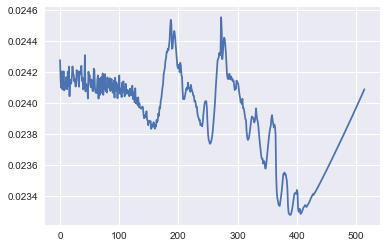

In [6]:
plt.plot(X[0]['data']['spectrum'])

# Extracting information to be used for decisions on creating the ASPA

In [7]:
t = X[:10] # select the first 10 samples for EDA

In [8]:
"""
At this point i do not yet know what the x axis from 0 to ~550 represents. 
However, it does represent something... so lets extract the index information and add it as a column
"""

'\nAt this point i do not yet know what the x axis from 0 to ~550 represents. \nHowever, it does represent something... so lets extract the index information and add it as a column\n'

In [9]:
len(X[0]['data']['spectrum'])

515

In [10]:
q = X[0]['data']['spectrum']
q.shape

(515,)

In [11]:
# Create artifical arrays to make sure the transformations go as planned

a = np.array([(10+10*i) for i in range(5)])
b = np.array([(20+20*i) for i in range(5)])
c = np.array([a, b])
c.shape

(2, 5)

In [12]:
q = np.expand_dims(c, axis=1)
q.shape

(2, 1, 5)

In [13]:
indices = np.array([i for i in range(5)])
indices

array([0, 1, 2, 3, 4])

In [14]:
combined = np.insert(q, 1, indices, axis=1)
combined.shape # [n_samples, (y_data, x_data), n_datapoints]

(2, 2, 5)

In [15]:
combined

array([[[ 10,  20,  30,  40,  50],
        [  0,   1,   2,   3,   4]],

       [[ 20,  40,  60,  80, 100],
        [  0,   1,   2,   3,   4]]])

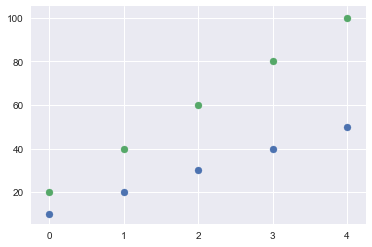

In [16]:
for i in range(q.shape[0]):
    plt.scatter(combined[i, 1, :], combined[i, 0, :]) # plot the i samples

# Do the same with the real data

In [17]:
X[0]['data']['spectrum'].shape

(515,)

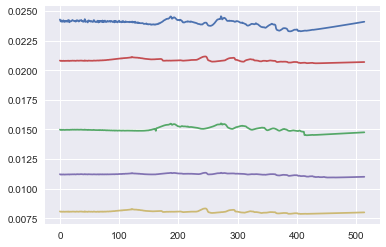

In [18]:
for i in range(5):
    sample = X[i]['data']['spectrum']
    plt.plot(np.arange(0, len(sample)), sample) # np.arange creates an awway from min to max

# Visualizing the distribution of X and y

In [19]:
# Shuffle X along the first axis to make the order of simulations random
np.random.shuffle(X) # note that X = np.rand.... isn't required

## Extracting information from dict and put it in a df

In [20]:
X[0]['param'].keys()

dict_keys(['planet_mass', 'temperature_profile', 'ch4_mixratio', 'planet_radius', 'h2o_mixratio', 'co2_mixratio', 'co_mixratio'])

In [21]:
"""
Extract data of all the samples, combine it into two arrays. 
Could be mroe efficient, but this is just for EDA purposes
"""

spectra = []
indices = []

for i in range(100):
    spectrum = X[i]['data']['spectrum'] # get the wavelength values
    spectrum_index = np.arange(0, len(sample)) # get the index values   
    
    spectra.append(spectrum)
    indices.append(spectrum_index)
    
    
spectra = np.array(spectra).flatten()
indices = np.array(indices).flatten()


print(spectra.shape, indices.shape)

(51500,) (51500,)


In [22]:
# Convert the arrays to a pandas dataframe
df1 = pd.DataFrame({"indices":indices, "spectra":spectra})
df1.head()

,indices,spectra
0,0,0.015121
1,1,0.015066
2,2,0.015049
3,3,0.015093
4,4,0.015048


In [23]:
# Construct the same type of df containing all the parameter info

# Visualization of the transformation for one sample
df2= pd.DataFrame.from_dict(X[0], orient='index')
df2

,spectrum,planet_mass,temperature_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
data,"[0.015121060309952737, 0.015065781947454641, 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
param,NaN,2.783733e+27,1555.555556,1.000000e-08,8.311641e+07,0.016681,0.000077,3.593814e-07


In [24]:
df2.drop(columns='spectrum').dropna() # First drops the spectrum row, then drops the NaNs in the data row

,planet_mass,temperature_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
param,2.783733e+27,1555.555556,1.000000e-08,8.311641e+07,0.016681,0.000077,3.593814e-07


In [25]:
# lets do this for all the samples (that are selected)
dfs2 = []
for i in range(100):
    df2= pd.DataFrame.from_dict(X[i], orient='index')
    df2 = df2.drop(columns='spectrum').dropna() # First drops the spectrum row, then drops the NaNs in the data row
    dfs2.append(df2)

df2 = pd.concat(dfs2) # Concat the list of dfs to one df

In [26]:
df2.head()

,planet_mass,temperature_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
param,2.783733e+27,1555.555556,1.000000e-08,8.311641e+07,1.668101e-02,7.742637e-05,3.593814e-07
param,3.036800e+27,1000.000000,1.291550e-05,8.855393e+07,1.000000e-01,5.994843e-08,1.000000e-01
param,3.036800e+27,1555.555556,7.742637e-05,7.767889e+07,3.593814e-07,5.994843e-08,1.000000e-08
param,2.024533e+27,1888.888889,7.742637e-05,8.311641e+07,1.668101e-02,7.742637e-05,1.291550e-05
param,2.530667e+27,1111.111111,5.994843e-08,7.767889e+07,5.994843e-08,4.641589e-04,2.782559e-03


# df1 and df2 are ready for EDA
Note that the plots of even 'only' 100 samples take a bit to be generated due to the point density.

## Spectrum distribution

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51500 entries, 0 to 51499
Data columns (total 2 columns):
indices    51500 non-null int32
spectra    51500 non-null float64
dtypes: float64(1), int32(1)
memory usage: 603.6 KB


In [28]:
df1.describe()

,indices,spectra
count,51500.000000,51500.000000
mean,257.000000,0.013973
std,148.668857,0.004971
min,0.000000,0.006489
25%,128.000000,0.009354
50%,257.000000,0.014516
75%,386.000000,0.017018
max,514.000000,0.025513


c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


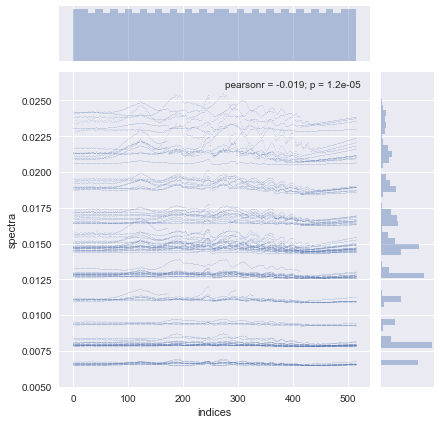

In [29]:
sns.jointplot(df1.indices, df1.spectra, joint_kws={"s":0.1, "alpha":0.3})

Wall time: 15.9 s


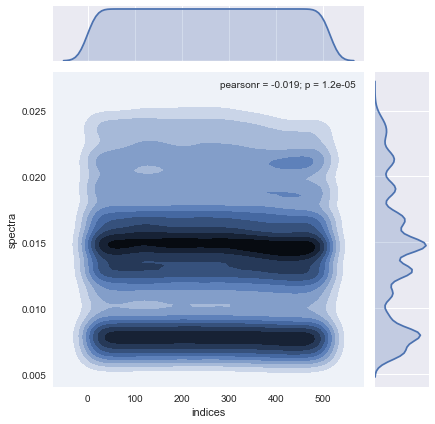

In [30]:
%%time

sns.jointplot(x="indices", y="spectra", data=df1, kind="kde")

Wall time: 15.6 s


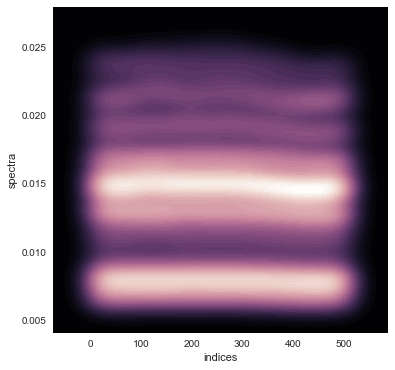

In [31]:
%%time

f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df1.indices, df1.spectra, cmap=cmap, n_levels=60, shade=True);

## Param distribution

In [77]:
df2.columns

Index(['planet_mass', 'temperature_profile', 'ch4_mixratio', 'planet_radius',
       'h2o_mixratio', 'co2_mixratio', 'co_mixratio'],
      dtype='object')

In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, param to param
Data columns (total 7 columns):
planet_mass            100 non-null float64
temperature_profile    100 non-null float64
ch4_mixratio           100 non-null float64
planet_radius          100 non-null float64
h2o_mixratio           100 non-null float64
co2_mixratio           100 non-null float64
co_mixratio            100 non-null float64
dtypes: float64(7)
memory usage: 6.2+ KB


In [79]:
df2.describe()

,planet_mass,temperature_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
count,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,2.642016e+27,1498.888889,1.088720e-02,7.876639e+07,6.940514e-03,1.363436e-02,1.074646e-02
std,6.789729e+26,312.875787,2.855901e-02,1.568726e+07,2.202454e-02,3.236595e-02,2.856502e-02
min,1.518400e+27,1000.000000,1.000000e-08,5.592880e+07,1.000000e-08,1.000000e-08,1.000000e-08
25%,2.024533e+27,1222.222222,3.593814e-07,6.544446e+07,5.994843e-08,2.154435e-06,3.593814e-07
50%,2.783733e+27,1555.555556,4.517093e-05,7.767889e+07,1.291550e-05,4.517093e-05,1.291550e-05
75%,3.100067e+27,1777.777778,2.782559e-03,9.399146e+07,4.641589e-04,2.782559e-03,2.782559e-03
max,3.796000e+27,2000.000000,1.000000e-01,1.048665e+08,1.000000e-01,1.000000e-01,1.000000e-01


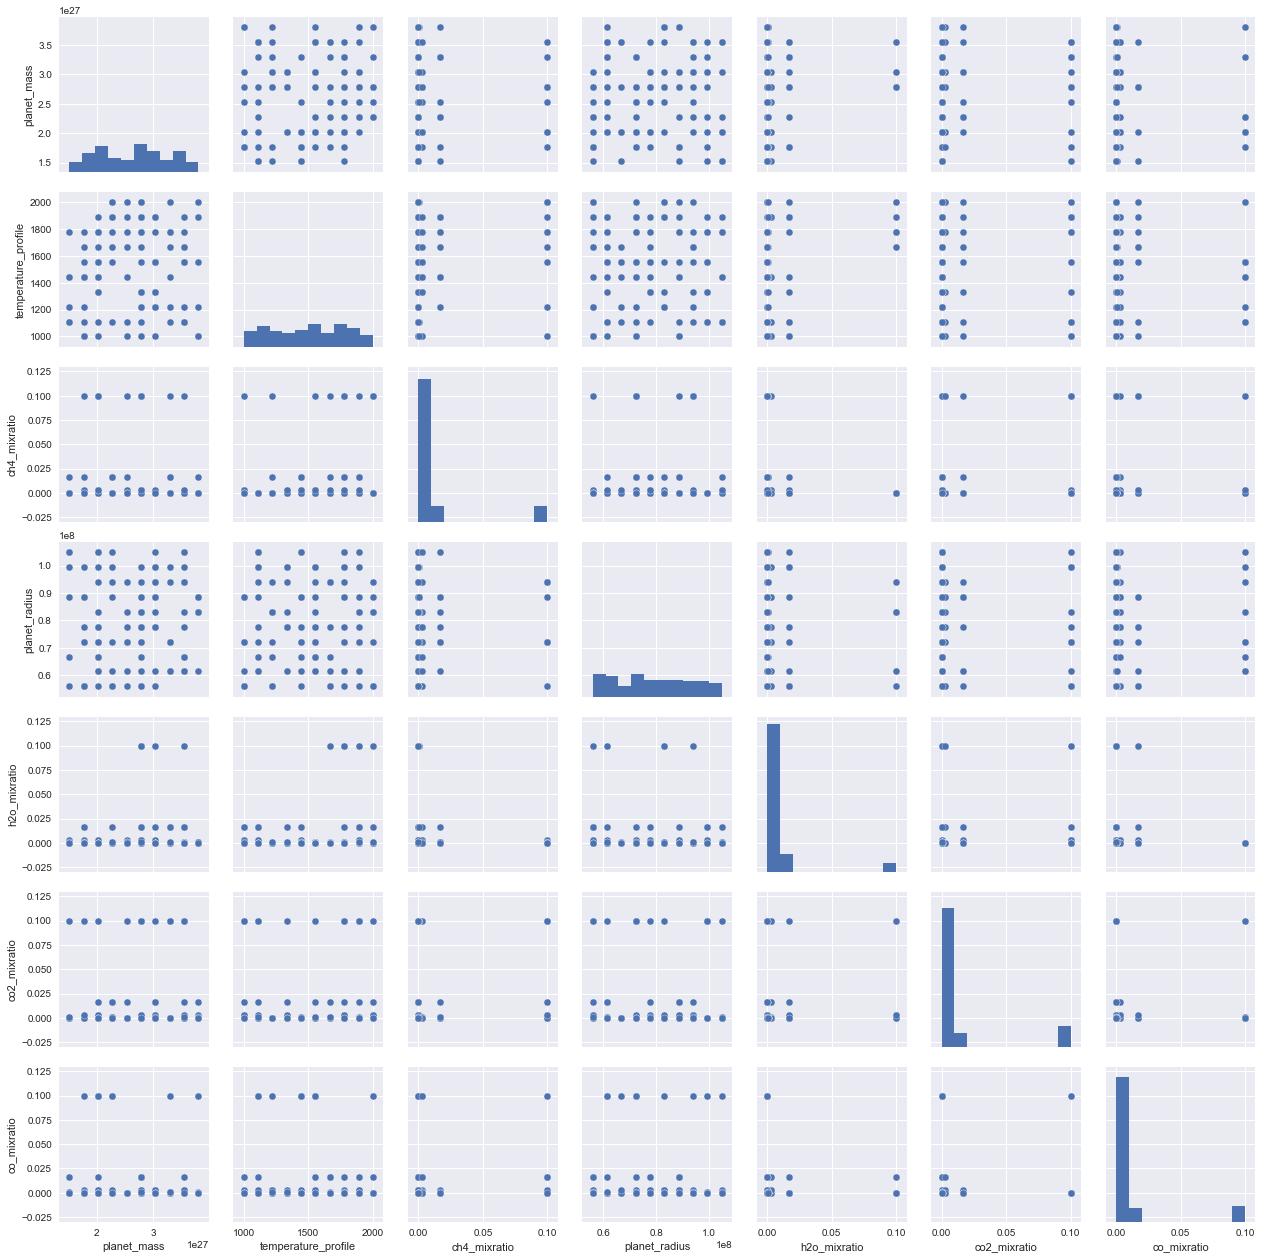

In [81]:
sns.pairplot(df2)

In [32]:
# Get the distribution of the complete (loaded) dataset
spectra = []
indices = []

for i in range(len(X)):
    spectrum = X[i]['data']['spectrum'] # get the wavelength values
    spectrum_index = np.arange(0, len(sample)) # get the index values   
    
    spectra.append(spectrum)
    indices.append(spectrum_index)
    
    
spectra = np.array(spectra).flatten()
indices = np.array(indices).flatten()

df1 = pd.DataFrame({"indices":indices, "spectra":spectra})

In [33]:
dfs2 = []
for i in range(100):
    df2= pd.DataFrame.from_dict(X[i], orient='index')
    df2 = df2.drop(columns='spectrum').dropna() # First drops the spectrum row, then drops the NaNs in the data row
    dfs2.append(df2)

df2 = pd.concat(dfs2) # Concat the list of dfs to one df

In [35]:
%%time
df1.describe()

Wall time: 7.75 s


,indices,spectra
count,5.150000e+07,5.150000e+07
mean,2.570000e+02,1.442557e-02
std,1.486674e+02,5.538646e-03
min,0.000000e+00,6.472899e-03
25%,1.280000e+02,9.458699e-03
50%,2.570000e+02,1.388331e-02
75%,3.860000e+02,1.895608e-02
max,5.140000e+02,3.017938e-02


In [37]:
%%time
df2.describe()

Wall time: 32.2 ms


,planet_mass,temperature_profile,ch4_mixratio,planet_radius,h2o_mixratio,co2_mixratio,co_mixratio
count,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,2.773611e+27,1518.888889,1.020823e-02,7.936452e+07,1.198182e-02,8.279501e-03,1.377637e-02
std,7.175138e+26,330.913401,2.710516e-02,1.432798e+07,2.845656e-02,2.559834e-02,3.101851e-02
min,1.518400e+27,1000.000000,1.000000e-08,5.592880e+07,1.000000e-08,1.000000e-08,1.000000e-08
25%,2.277600e+27,1222.222222,3.593814e-07,6.680384e+07,2.154435e-06,5.994843e-08,3.593814e-07
50%,2.783733e+27,1555.555556,1.291550e-05,8.311641e+07,7.742637e-05,1.291550e-05,7.742637e-05
75%,3.542933e+27,1777.777778,2.782559e-03,8.855393e+07,6.257171e-03,4.641589e-04,1.668101e-02
max,3.796000e+27,2000.000000,1.000000e-01,1.048665e+08,1.000000e-01,1.000000e-01,1.000000e-01
